In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

print("NOTEBOOK STARTED ✅")

# ---- Load NEW CSV in the same folder as the notebook ----
BASE_DIR = Path().resolve()
CSV_PATH = BASE_DIR / "health_insurance_portfolio.csv"

if not CSV_PATH.exists():
    raise FileNotFoundError(
        f"Could not find {CSV_PATH.name} in: {BASE_DIR}\n"
        f"Files found: {[x.name for x in BASE_DIR.iterdir()]}"
    )

print("Using CSV:", CSV_PATH.name)

df = pd.read_csv(CSV_PATH)
print("Shape:", df.shape)
print(df.head())
print("\nMissing values:\n", df.isna().sum())

# ---- Show columns so you can confirm target ----
print("\nCOLUMNS:")
print(df.columns.tolist())

# =========================================================
# ✅ SET YOUR TARGET HERE (if you know the premium column)
# Example: TARGET_COL = "Annual_Premium" or


NOTEBOOK STARTED ✅
Using CSV: health_insurance_portfolio.csv
Shape: (228711, 42)
    ID  ID_policy  ID_insured  period date_effect_insured date_lapse_insured  \
0  1_1          1           1    2017          1993-06-15         2017-12-20   
1  1_2          1           2    2017          1993-06-15                NaN   
2  2_1          2           1    2017          1993-06-16                NaN   
3  3_3          3           3    2017          1993-06-15                NaN   
4  3_5          3           5    2017          1993-06-15                NaN   

  date_effect_policy date_lapse_policy  year_effect_insured  \
0         1993-06-15               NaN                 1993   
1         1993-06-15               NaN                 1993   
2         1993-06-16               NaN                 1993   
3         1993-06-15               NaN                 1993   
4         1993-06-15               NaN                 1993   

   year_lapse_insured  ...  C_H   C_GI  C_II  C_IE_P  C_IE_

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

print("NOTEBOOK STARTED ✅")

# ---- Load NEW CSV in the same folder as the notebook ----
BASE_DIR = Path().resolve()
CSV_PATH = BASE_DIR / "health_insurance_portfolio.csv"

if not CSV_PATH.exists():
    raise FileNotFoundError(
        f"Could not find {CSV_PATH.name} in: {BASE_DIR}\n"
        f"Files found: {[x.name for x in BASE_DIR.iterdir()]}"
    )

print("Using CSV:", CSV_PATH.name)

df = pd.read_csv(CSV_PATH)
print("Shape:", df.shape)
print(df.head())
print("\nMissing values:\n", df.isna().sum())

# ---- Show columns so you can confirm target ----
print("\nCOLUMNS:")
print(df.columns.tolist())

# =========================================================
# ✅ SET YOUR TARGET HERE (if you know the premium column)
# Example: TARGET_COL = "Annual_Premium" or "premium" etc.
# Leave as None to auto-detect.
# =========================================================
TARGET_COL = None

# ---- Auto-detect target (premium/cost-like columns) ----
target_candidates = [
    "premium", "annual_premium", "monthly_premium",
    "charges", "charge", "cost", "insurance_cost",
    "total_cost", "claim_amount", "claim", "amount", "price"
]

# Try exact match first
target = TARGET_COL if TARGET_COL in df.columns else None
if target is None:
    # case-insensitive match
    cols_lower = {c.lower(): c for c in df.columns}
    for cand in target_candidates:
        if cand in cols_lower:
            target = cols_lower[cand]
            break

# If still not found, suggest best options (numeric columns containing keywords)
if target is None:
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    keyword_hits = []
    for c in numeric_cols:
        cl = c.lower()
        if any(k in cl for k in ["prem", "charg", "cost", "claim", "amount", "price", "paid"]):
            keyword_hits.append(c)

    print("\n❌ Could not auto-detect target.")
    print("✅ Pick ONE target column manually and set TARGET_COL at the top.")
    print("Suggested numeric target candidates:")
    print(keyword_hits[:30])
    raise ValueError("Set TARGET_COL to your premium/cost column name and rerun.")

print("\n✅ Target column selected:", target)

# ---- Split X / y ----
X = df.drop(columns=[target])
y = df[target]

# ---- Feature types ----
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

print("\nNumeric features:", num_cols[:20], "..." if len(num_cols) > 20 else "")
print("Categorical features:", cat_cols[:20], "..." if len(cat_cols) > 20 else "")

# ---- Preprocessing + Model ----
pre = ColumnTransformer([
    ("num", "passthrough", num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
])

model = Pipeline([
    ("pre", pre),
    ("reg", LinearRegression())
])

# ---- Train/Test split ----
# Drop rows where target is missing
mask = y.notna()
X = X.loc[mask]
y = y.loc[mask]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---- Train + Predict ----
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ---- Metrics ----
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # compatible with older sklearn

print("\n===== FIRST RESULTS (Linear Regression Baseline) =====")
print(f"R2   : {r2:.4f}")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")

# ---- Plot ----
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel(f"Actual {target}")
plt.ylabel(f"Predicted {target}")
plt.title("Actual vs Predicted (Linear Regression)")
plt.tight_layout()
plt.show()


NOTEBOOK STARTED ✅
Using CSV: health_insurance_portfolio.csv
Shape: (228711, 42)
    ID  ID_policy  ID_insured  period date_effect_insured date_lapse_insured  \
0  1_1          1           1    2017          1993-06-15         2017-12-20   
1  1_2          1           2    2017          1993-06-15                NaN   
2  2_1          2           1    2017          1993-06-16                NaN   
3  3_3          3           3    2017          1993-06-15                NaN   
4  3_5          3           5    2017          1993-06-15                NaN   

  date_effect_policy date_lapse_policy  year_effect_insured  \
0         1993-06-15               NaN                 1993   
1         1993-06-15               NaN                 1993   
2         1993-06-16               NaN                 1993   
3         1993-06-15               NaN                 1993   
4         1993-06-15               NaN                 1993   

   year_lapse_insured  ...  C_H   C_GI  C_II  C_IE_P  C_IE_

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

NOTEBOOK STARTED ✅
Using CSV: health_insurance_portfolio.csv
Shape: (228711, 42)
    ID  ID_policy  ID_insured  period date_effect_insured date_lapse_insured  \
0  1_1          1           1    2017          1993-06-15         2017-12-20   
1  1_2          1           2    2017          1993-06-15                NaN   
2  2_1          2           1    2017          1993-06-16                NaN   
3  3_3          3           3    2017          1993-06-15                NaN   
4  3_5          3           5    2017          1993-06-15                NaN   

  date_effect_policy date_lapse_policy  year_effect_insured  \
0         1993-06-15               NaN                 1993   
1         1993-06-15               NaN                 1993   
2         1993-06-16               NaN                 1993   
3         1993-06-15               NaN                 1993   
4         1993-06-15               NaN                 1993   

   year_lapse_insured  ...  C_H   C_GI  C_II  C_IE_P  C_IE_

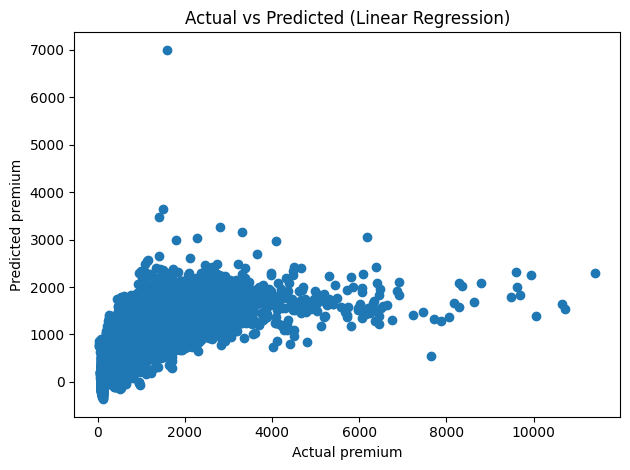

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

print("NOTEBOOK STARTED ✅")

# ---- Load NEW CSV ----
BASE_DIR = Path().resolve()
CSV_PATH = BASE_DIR / "health_insurance_portfolio.csv"

if not CSV_PATH.exists():
    raise FileNotFoundError(
        f"Could not find {CSV_PATH.name} in: {BASE_DIR}\n"
        f"Files found: {[x.name for x in BASE_DIR.iterdir()]}"
    )

print("Using CSV:", CSV_PATH.name)

df = pd.read_csv(CSV_PATH)
print("Shape:", df.shape)
print(df.head())
print("\nMissing values (top 20):\n", df.isna().sum().sort_values(ascending=False).head(20))

print("\nCOLUMNS:")
print(df.columns.tolist())

# -----------------------
# SET TARGET (if you know it)
# -----------------------
TARGET_COL = None  # <- set like "Annual_Premium" if needed

target_candidates = [
    "premium", "annual_premium", "monthly_premium",
    "charges", "charge", "cost", "insurance_cost",
    "total_cost", "claim_amount", "claim", "amount", "price"
]

target = TARGET_COL if (TARGET_COL in df.columns) else None
if target is None:
    cols_lower = {c.lower(): c for c in df.columns}
    for cand in target_candidates:
        if cand in cols_lower:
            target = cols_lower[cand]
            break

if target is None:
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    keyword_hits = []
    for c in numeric_cols:
        cl = c.lower()
        if any(k in cl for k in ["prem", "charg", "cost", "claim", "amount", "price", "paid"]):
            keyword_hits.append(c)

    print("\n❌ Could not auto-detect target.")
    print("Suggested numeric target candidates:\n", keyword_hits[:50])
    raise ValueError("Set TARGET_COL to your premium/cost column name and rerun.")

print("\n✅ Target column selected:", target)

# ---- Split X / y ----
X = df.drop(columns=[target])
y = df[target]

# Drop rows with missing target (keep X missing values; we will impute them)
mask = y.notna()
X = X.loc[mask]
y = y.loc[mask]

# ---- Feature types ----
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

print("\nNumeric features:", len(num_cols))
print("Categorical features:", len(cat_cols))

# ---- Preprocessing with Imputers ----
numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
])

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

pre = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_cols),
        ("cat", categorical_pipe, cat_cols),
    ]
)

model = Pipeline([
    ("pre", pre),
    ("reg", LinearRegression())
])

# ---- Train/Test split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---- Train + Predict ----
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ---- Metrics ----
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n===== FIRST RESULTS (Linear Regression Baseline) =====")
print(f"R2   : {r2:.4f}")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")

# ---- Plot ----
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel(f"Actual {target}")
plt.ylabel(f"Predicted {target}")
plt.title("Actual vs Predicted (Linear Regression)")
plt.tight_layout()
plt.show()


NOTEBOOK STARTED ✅
Loaded: health_insurance_portfolio.csv
Shape: (228711, 42)

Missing values (top 20):
 date_lapse_policy      174568
year_lapse_policy      174568
year_lapse_insured     167181
date_lapse_insured     167181
C_GE_S                  13213
C_GE_T                  13213
C_IE_T                  13213
C_IE_S                  13213
C_IE_P                  13213
C_GE_P                  13213
C_II                    13213
C_GI                    13213
C_H                     10886
IICIMUN                 10886
C_C                     10556
IICIPROV                 5701
ID                          0
ID_policy                   0
year_effect_insured         0
date_effect_policy          0
dtype: int64

Columns:
 ['ID', 'ID_policy', 'ID_insured', 'period', 'date_effect_insured', 'date_lapse_insured', 'date_effect_policy', 'date_lapse_policy', 'year_effect_insured', 'year_lapse_insured', 'year_effect_policy', 'year_lapse_policy', 'exposure_time', 'lapse', 'seniority_insured', 'sen

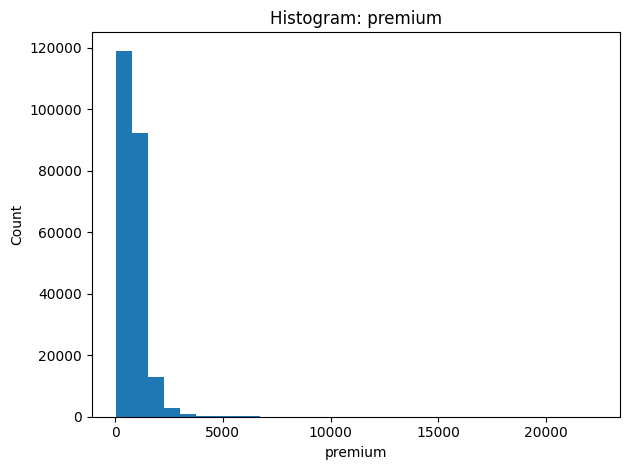

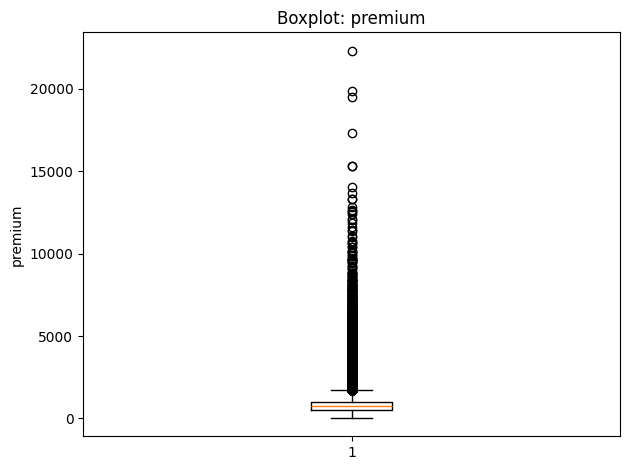

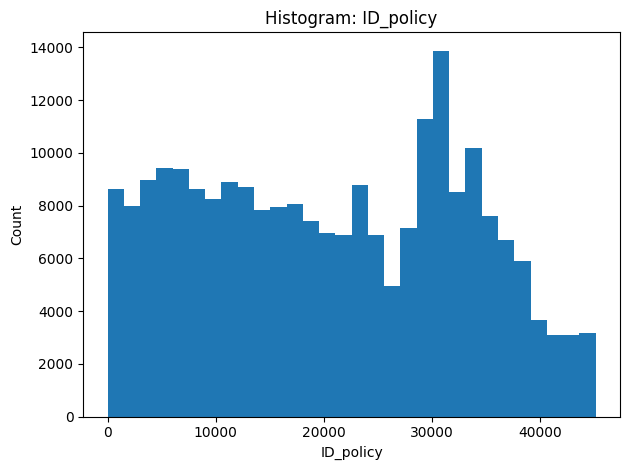

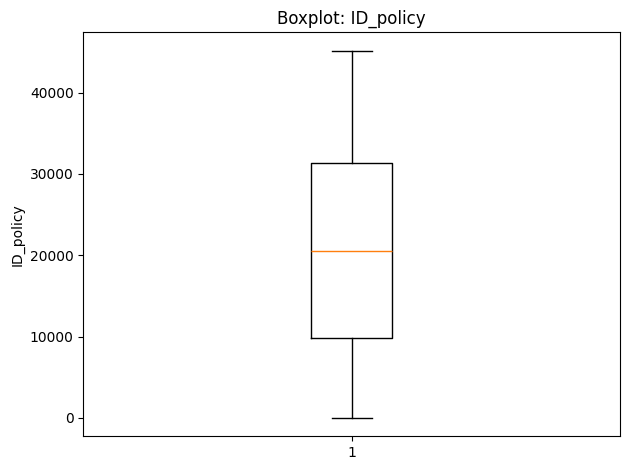

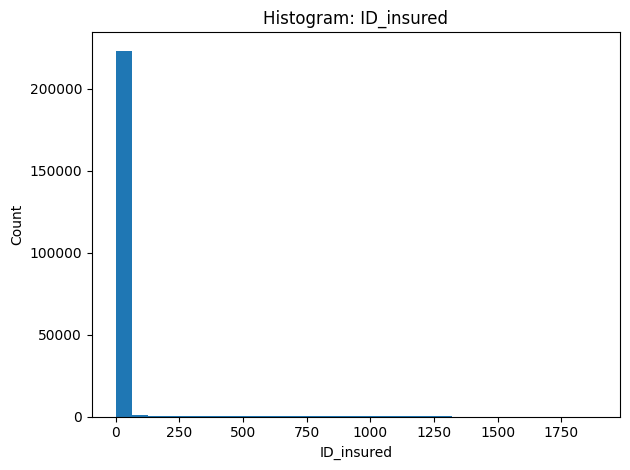

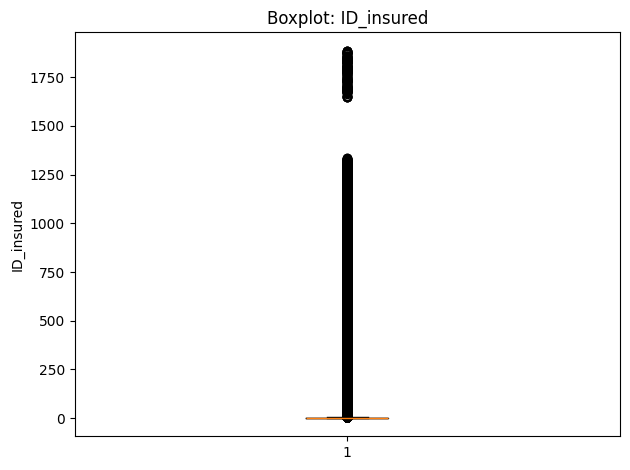

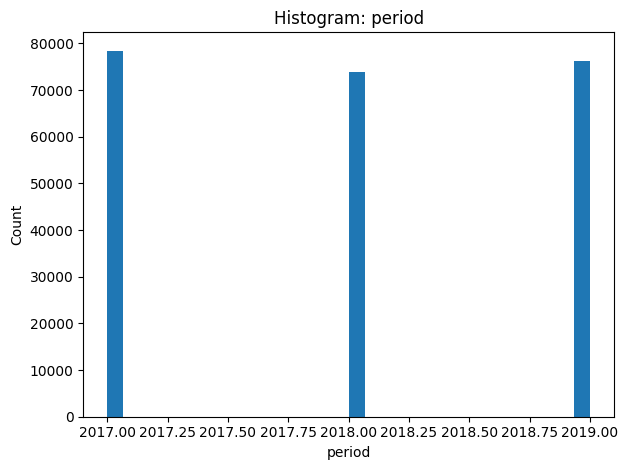

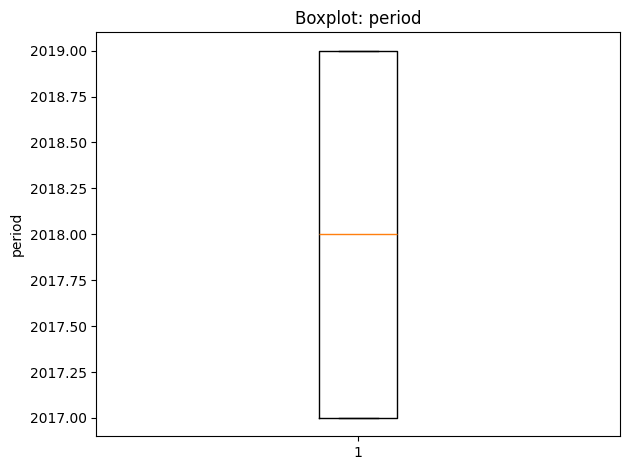

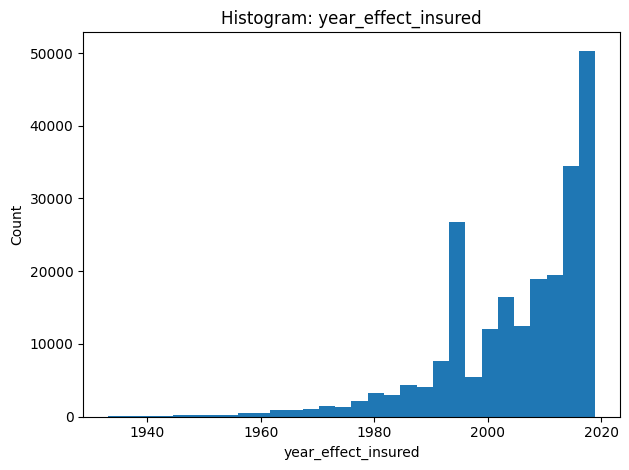

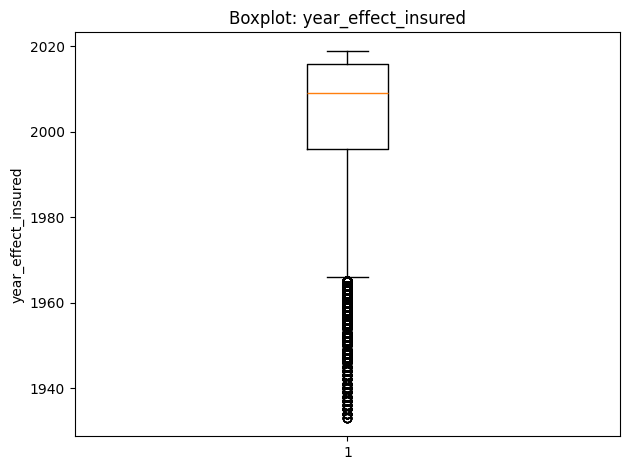

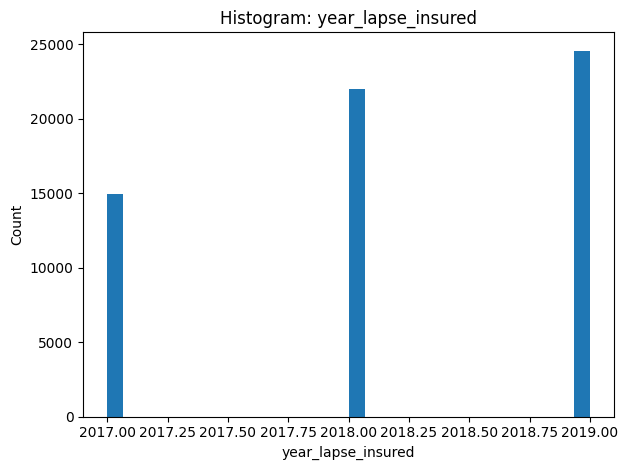

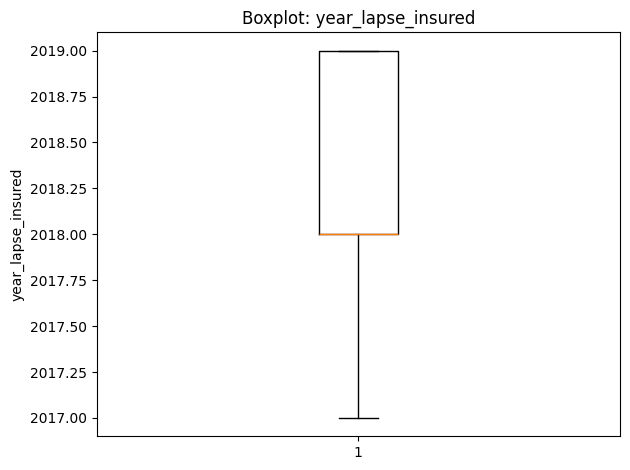

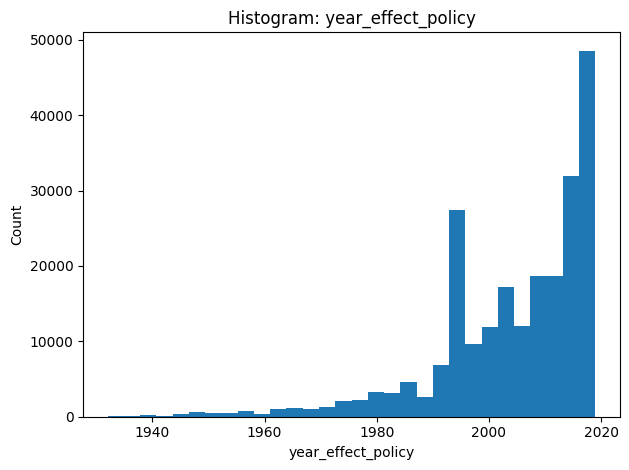

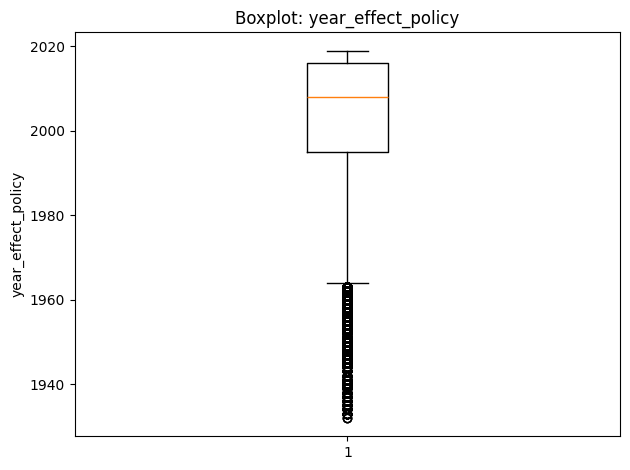

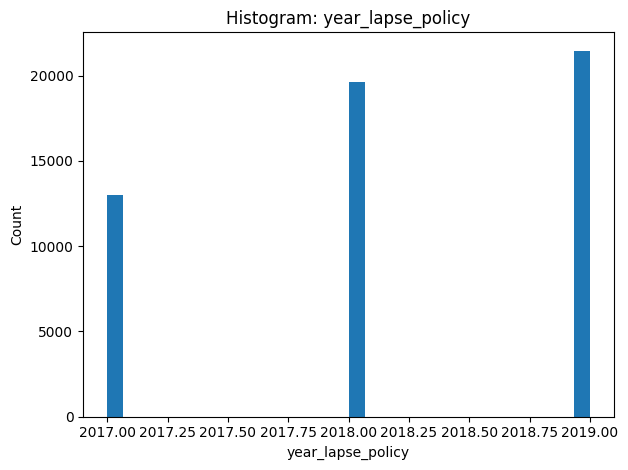

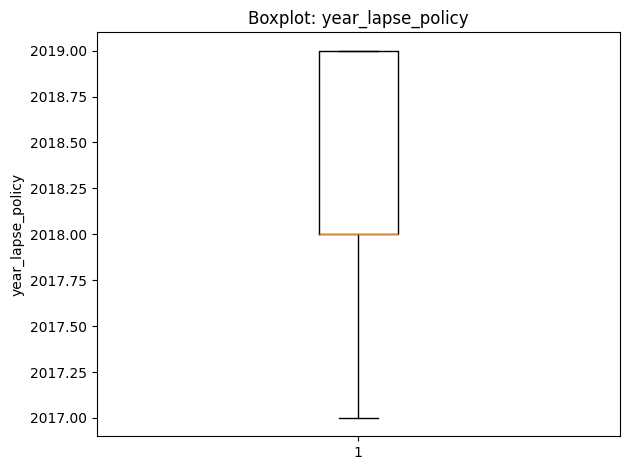

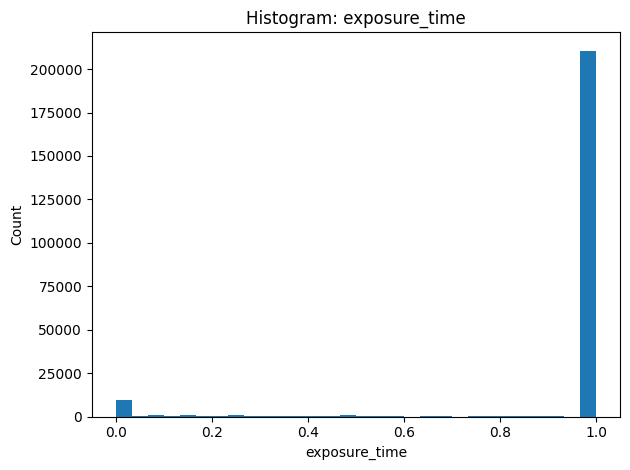

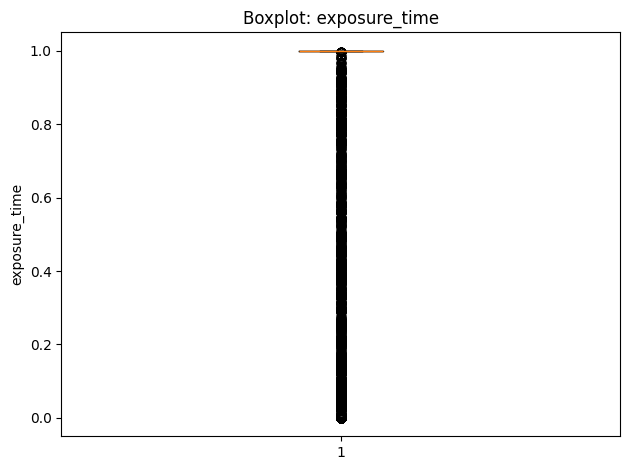

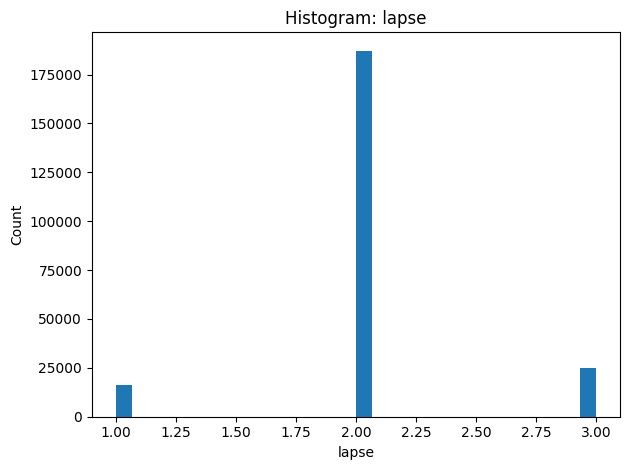

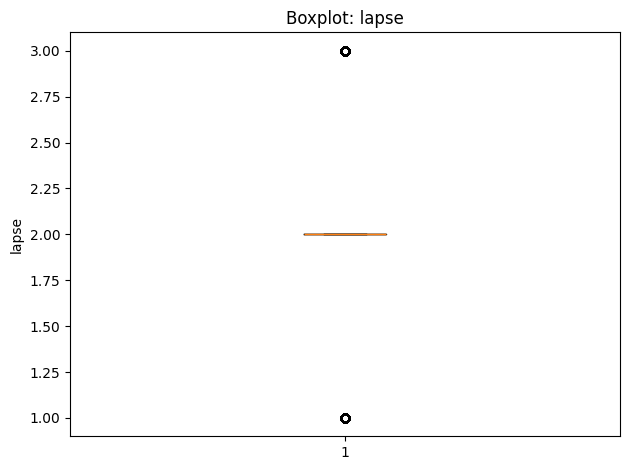

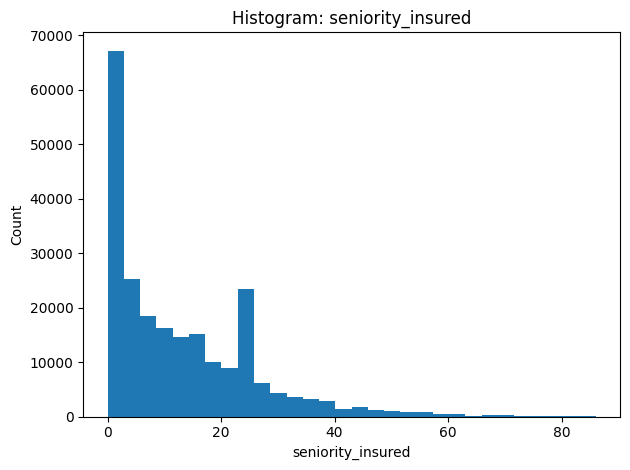

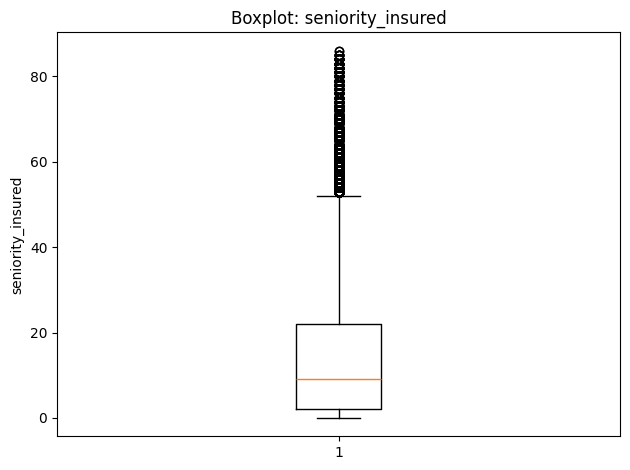

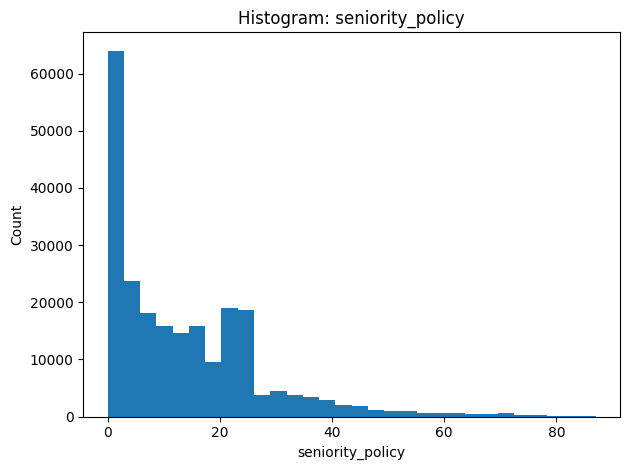

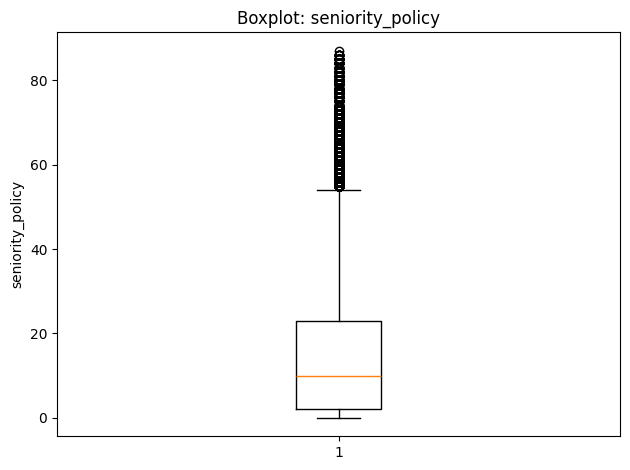

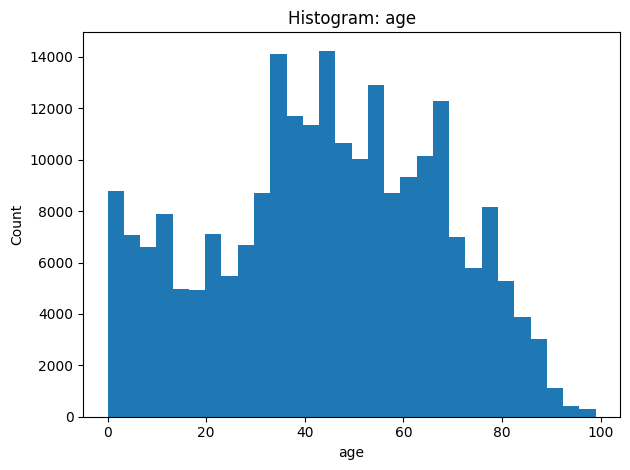

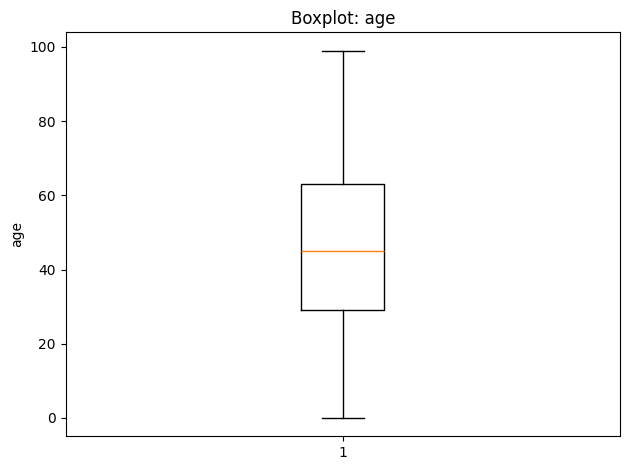

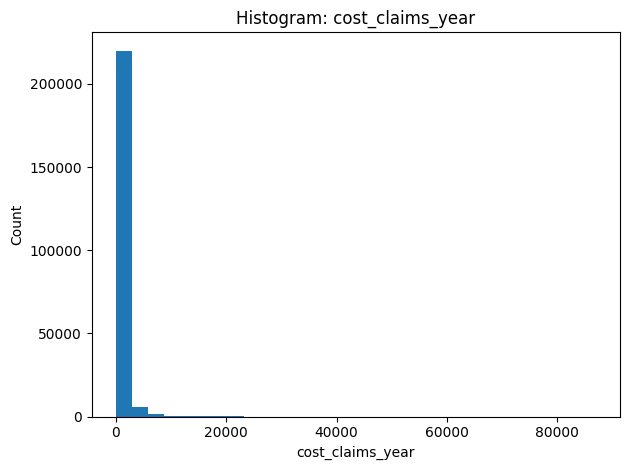

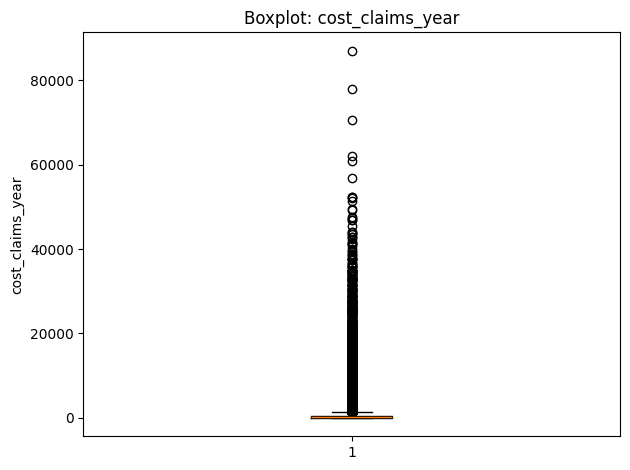

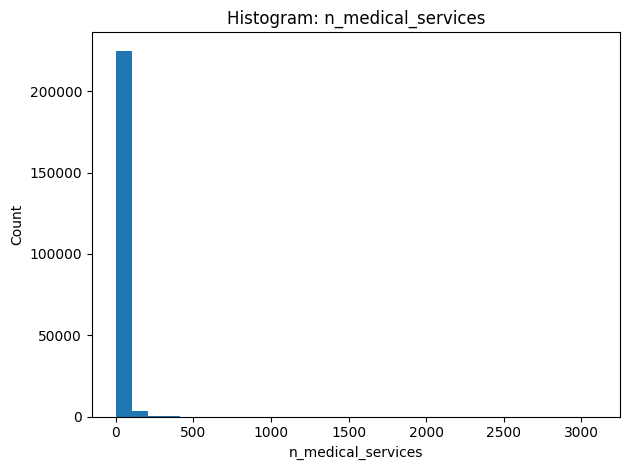

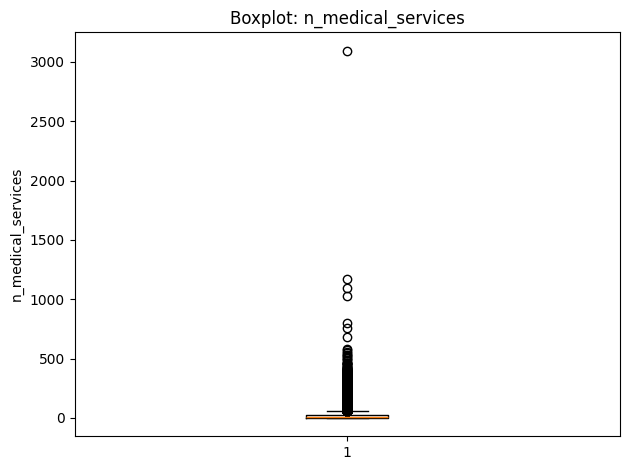

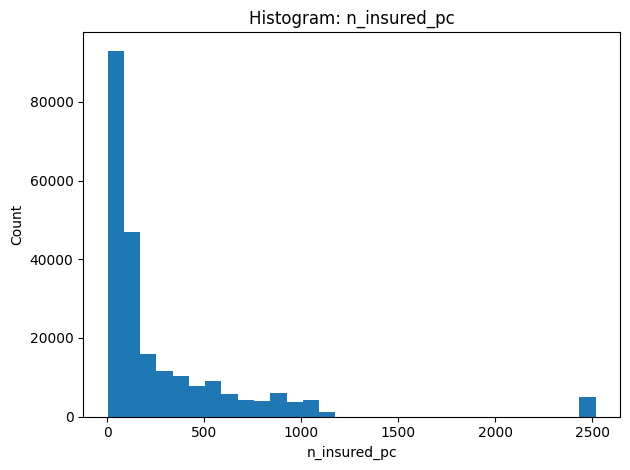

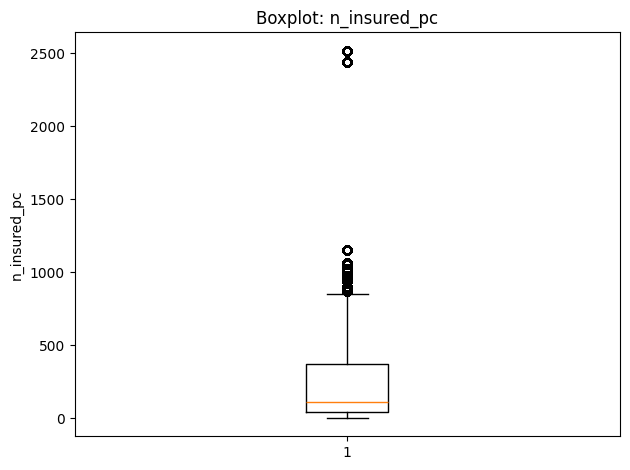

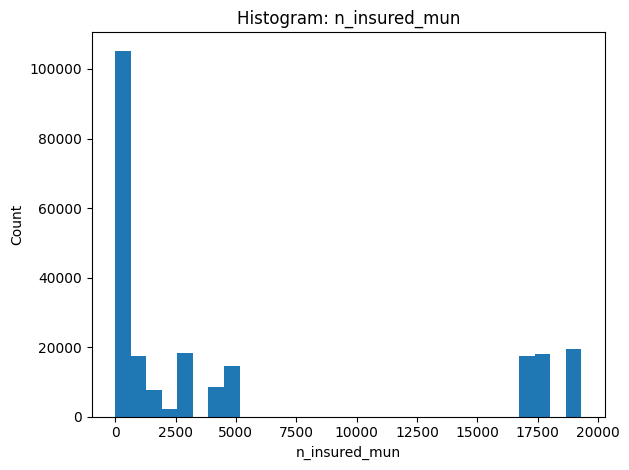

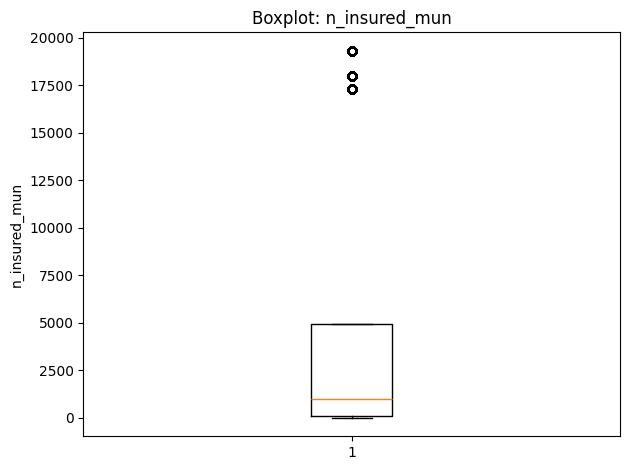

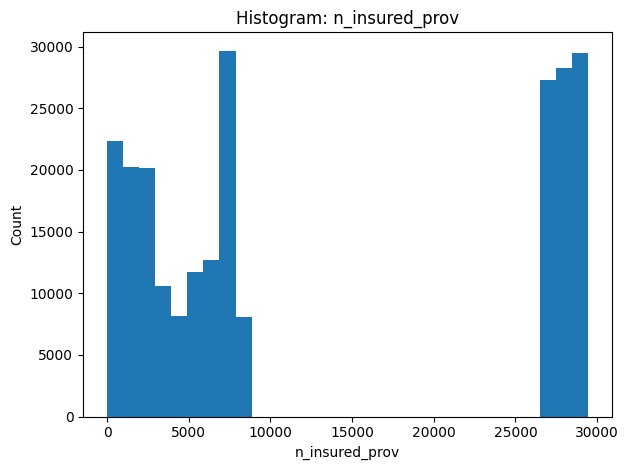

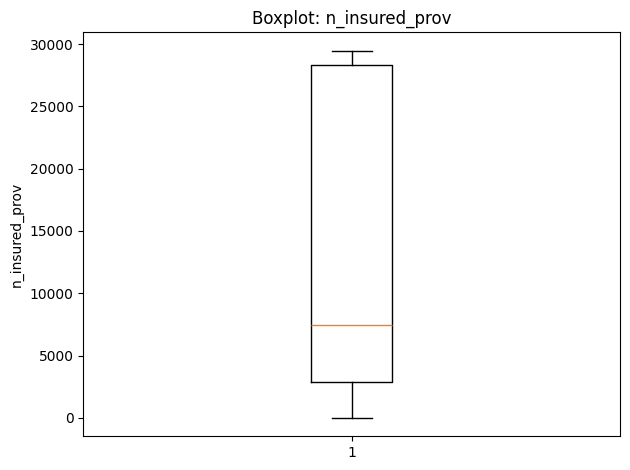

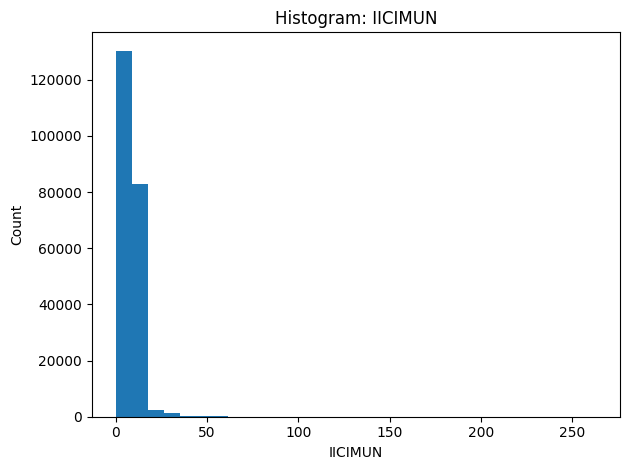

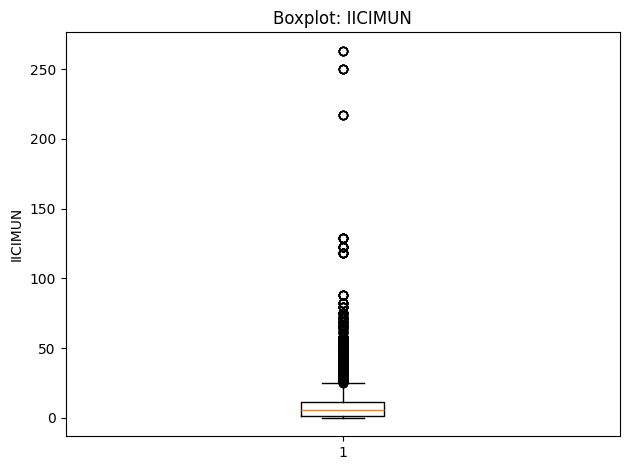

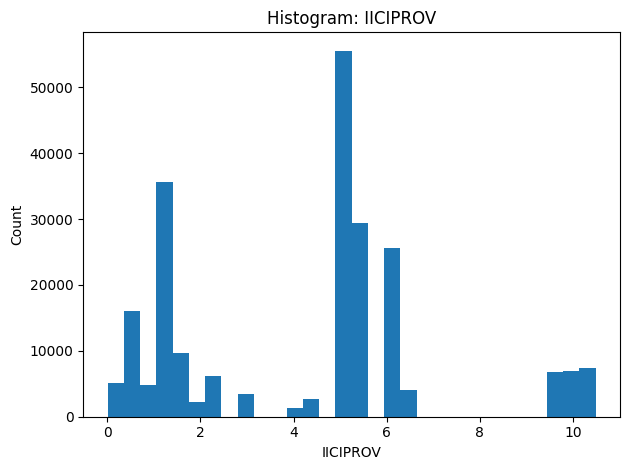

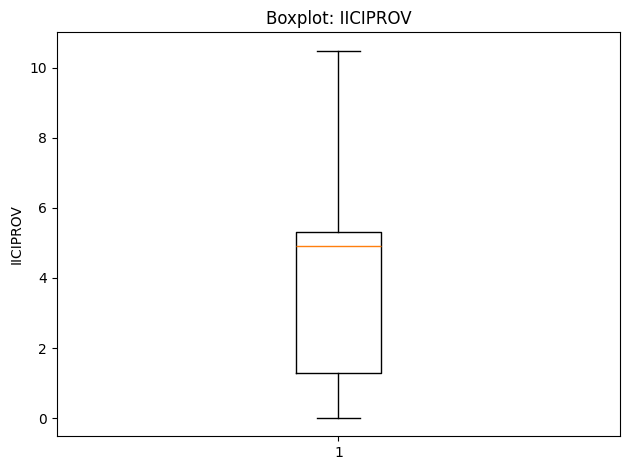

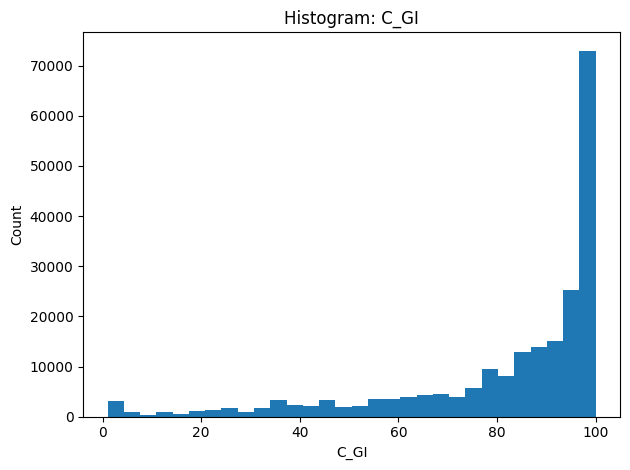

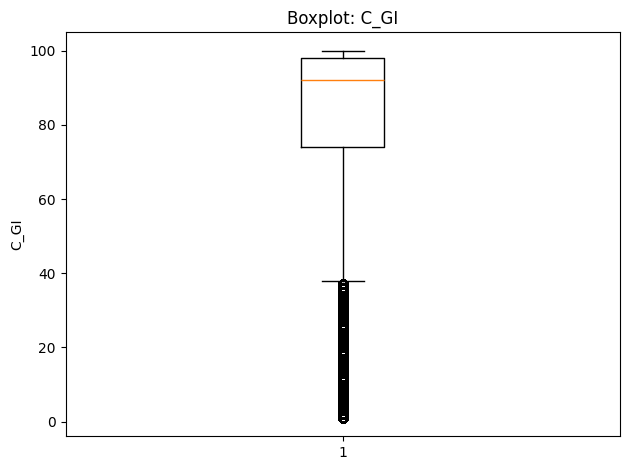

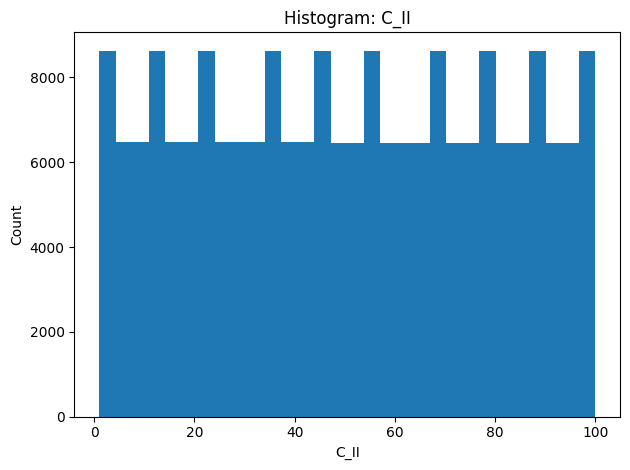

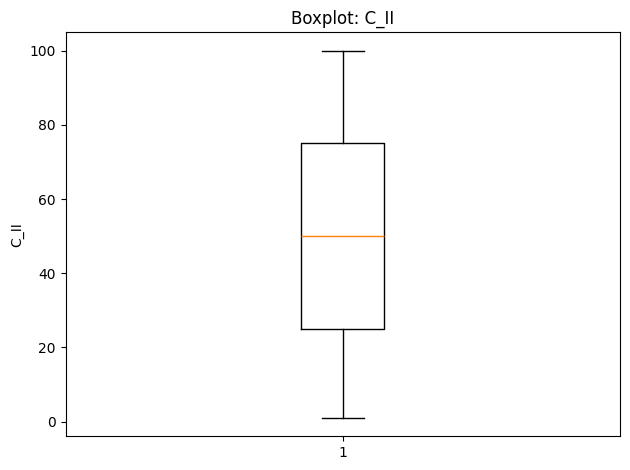

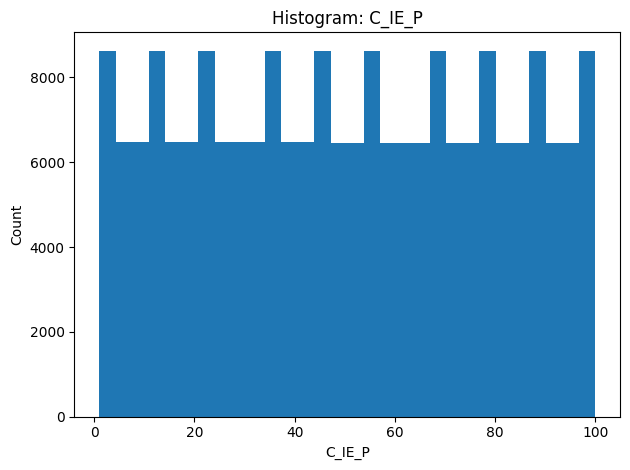

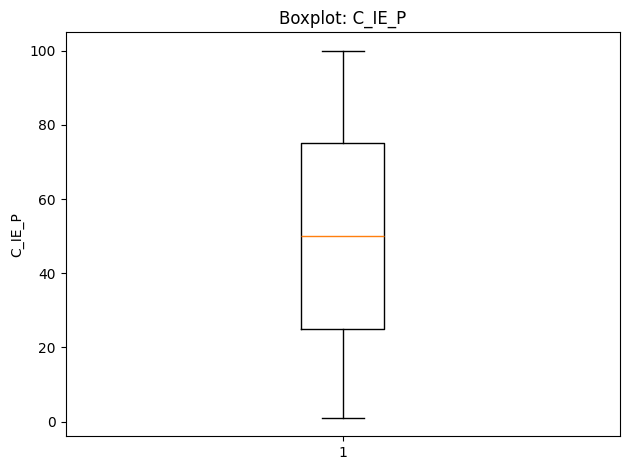

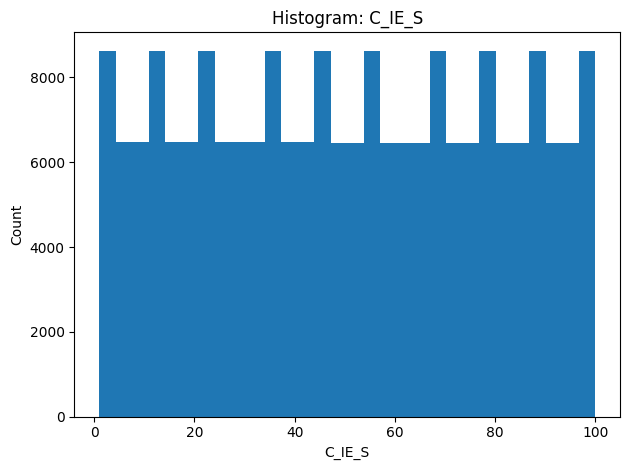

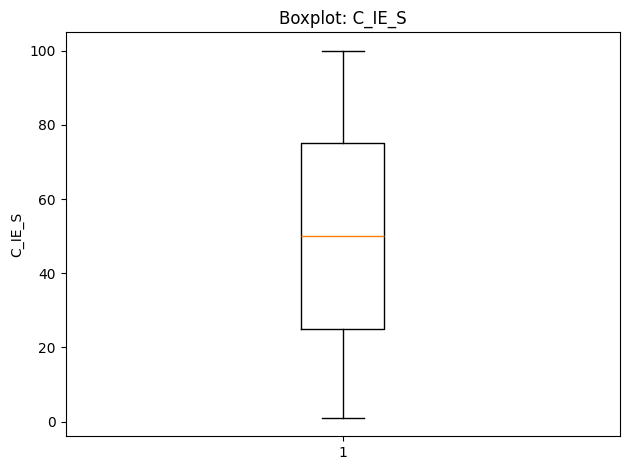

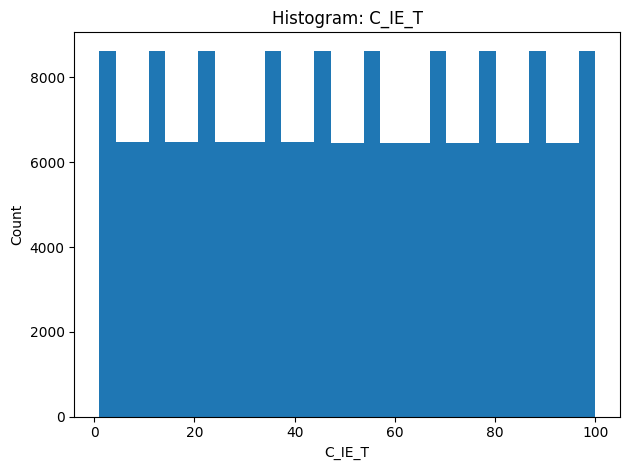

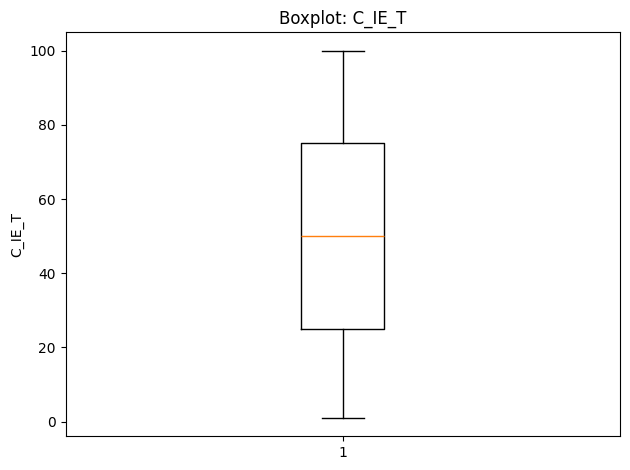

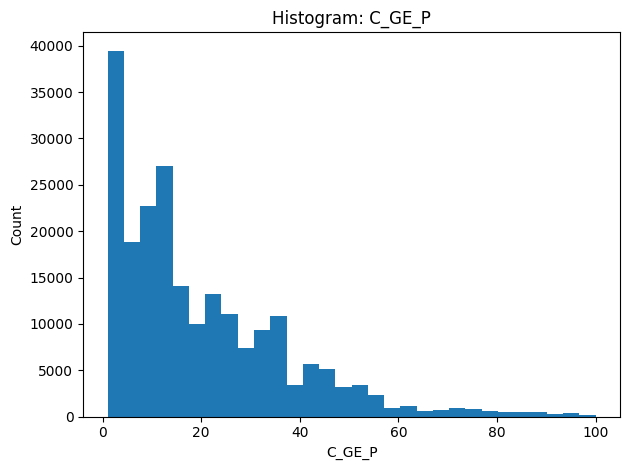

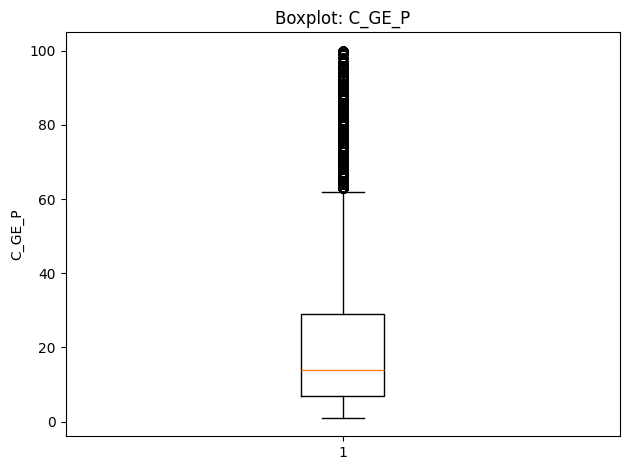

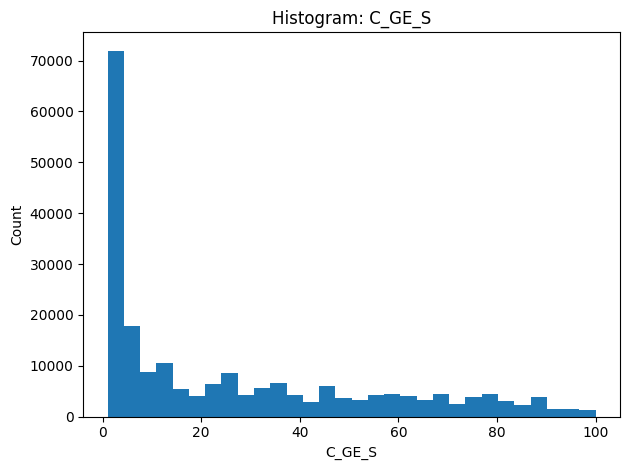

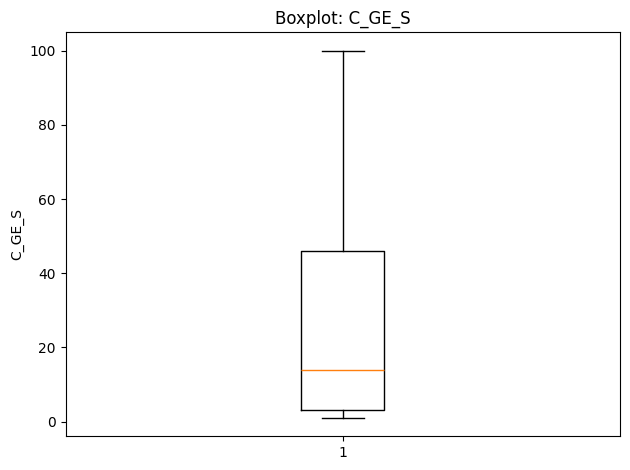

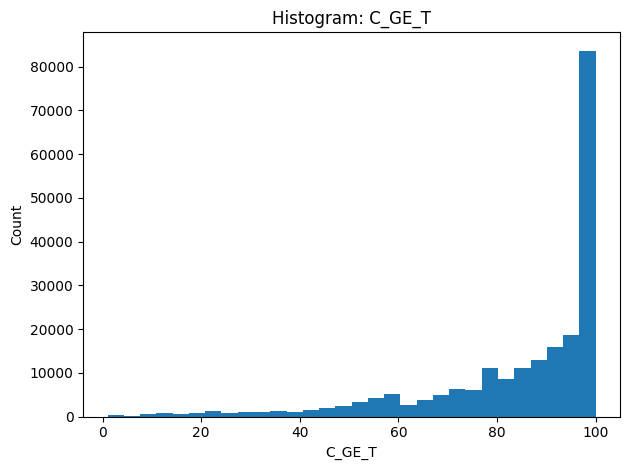

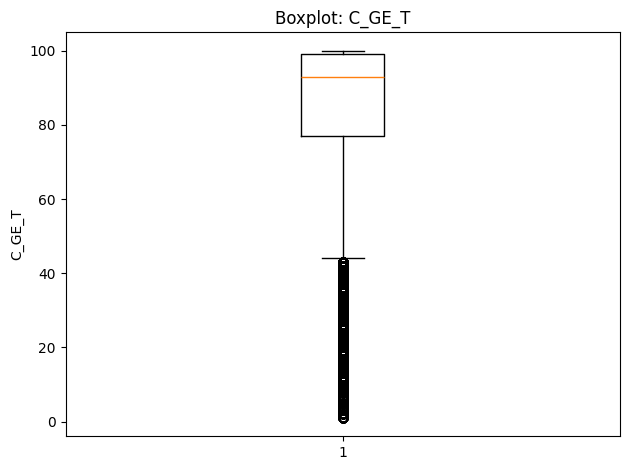

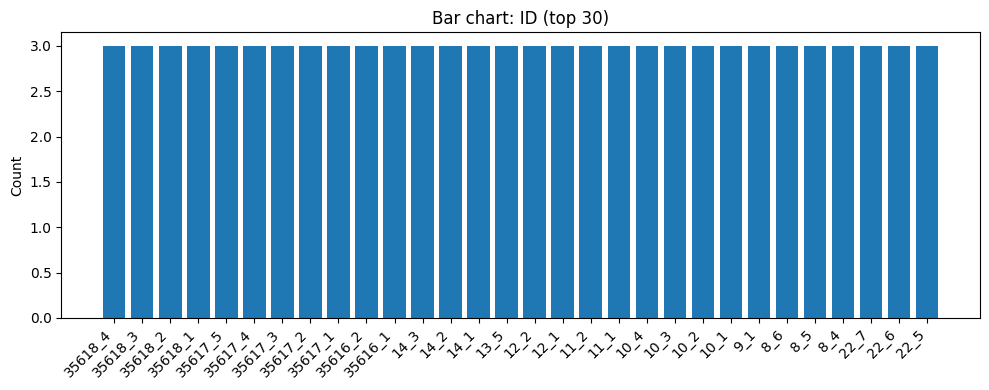

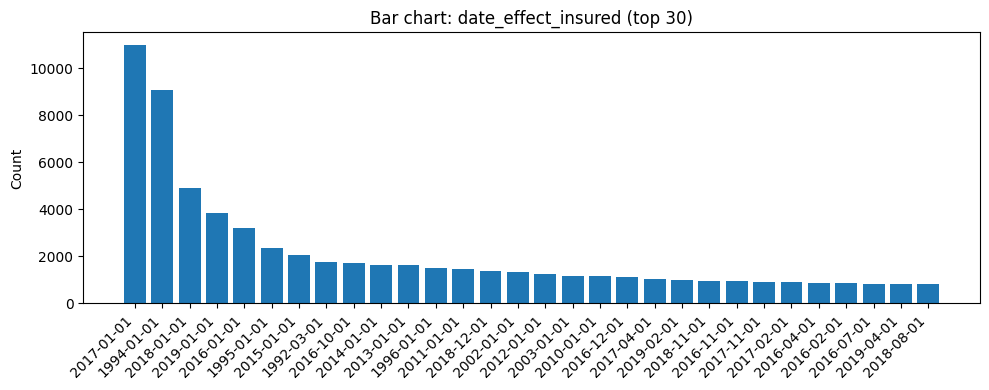

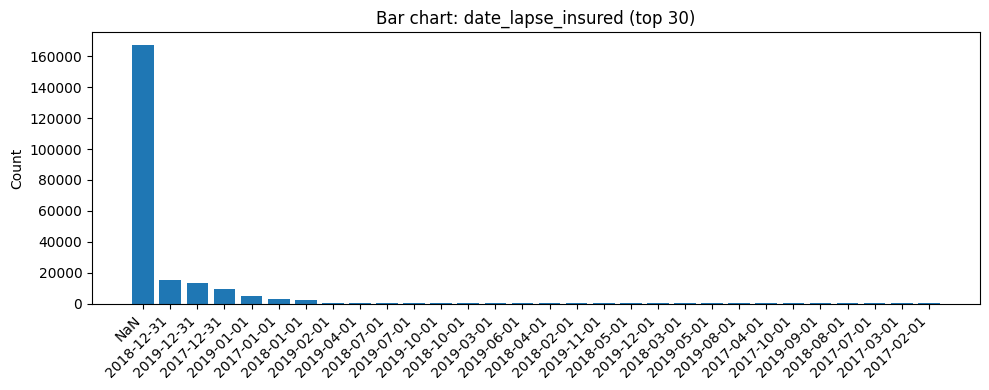

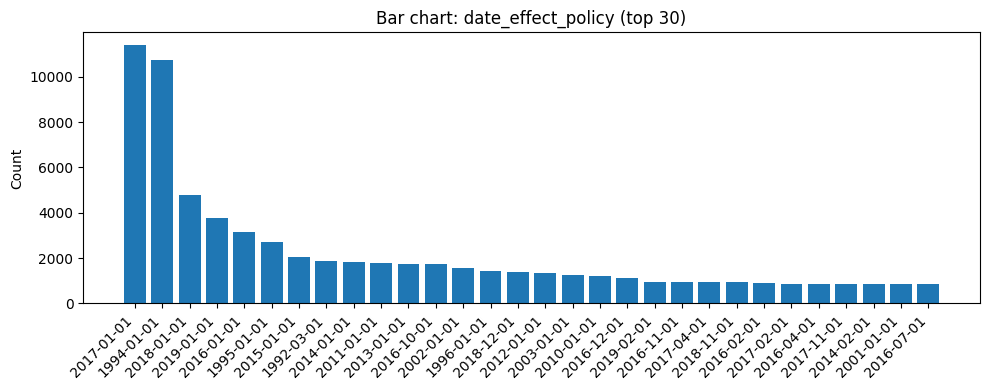

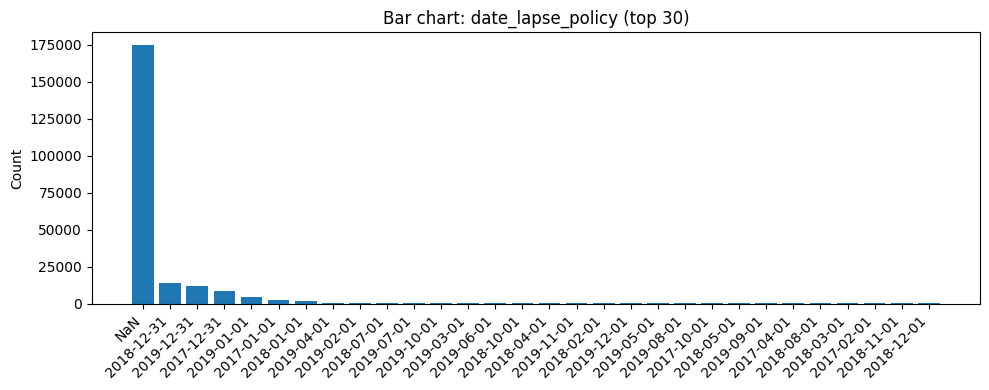

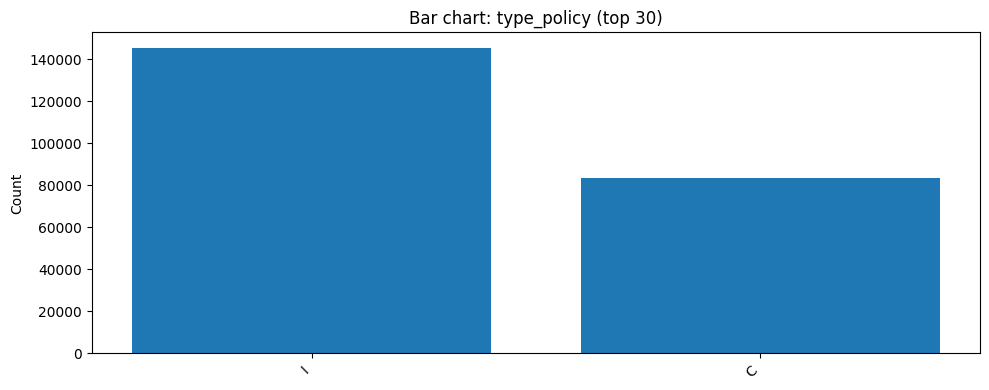

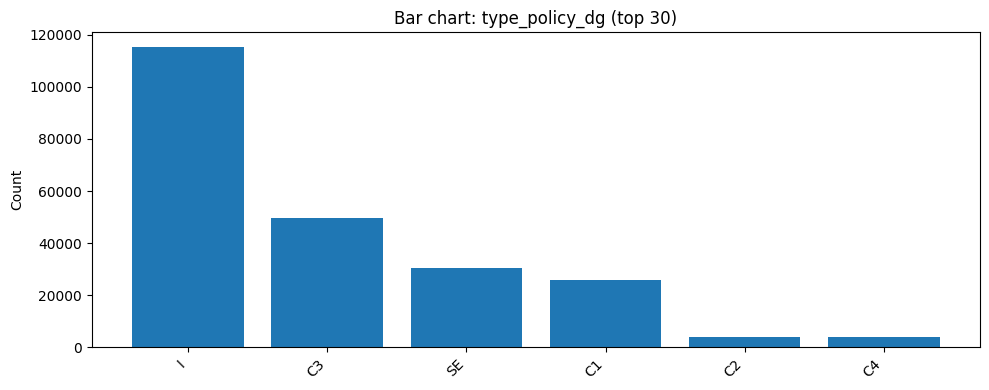

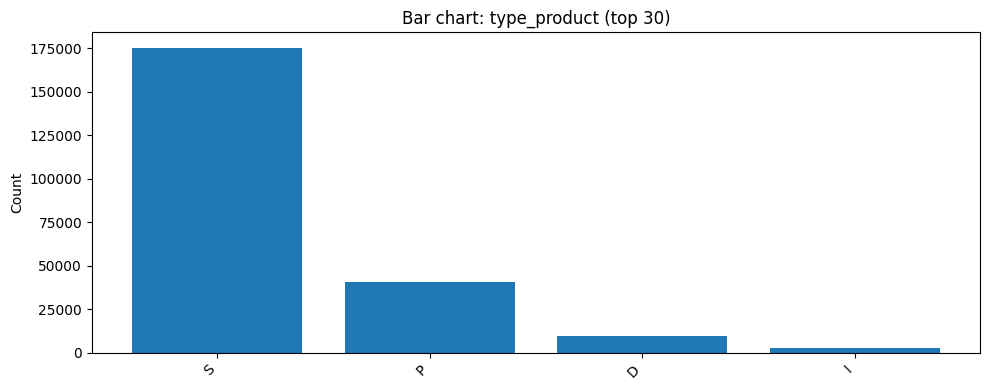

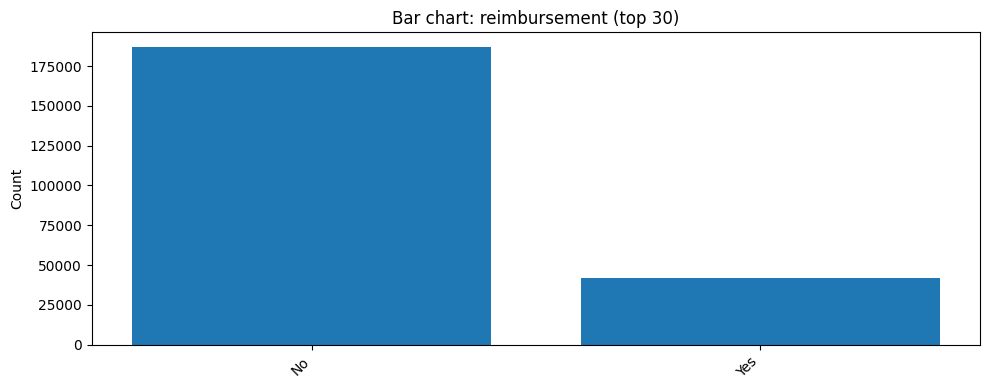

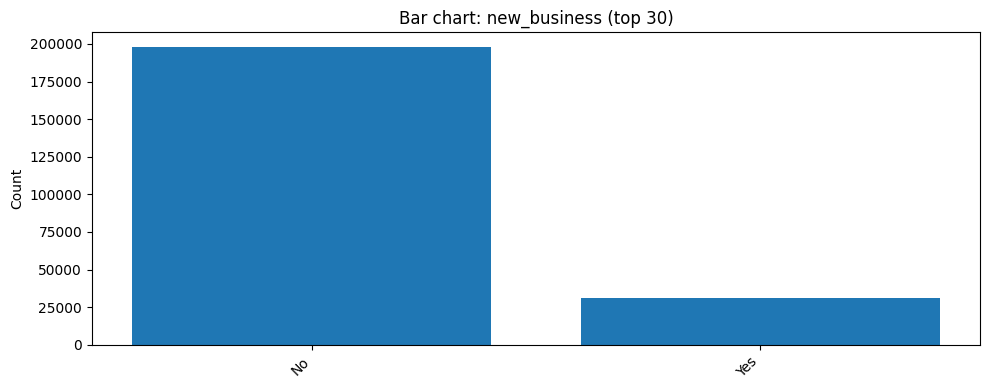

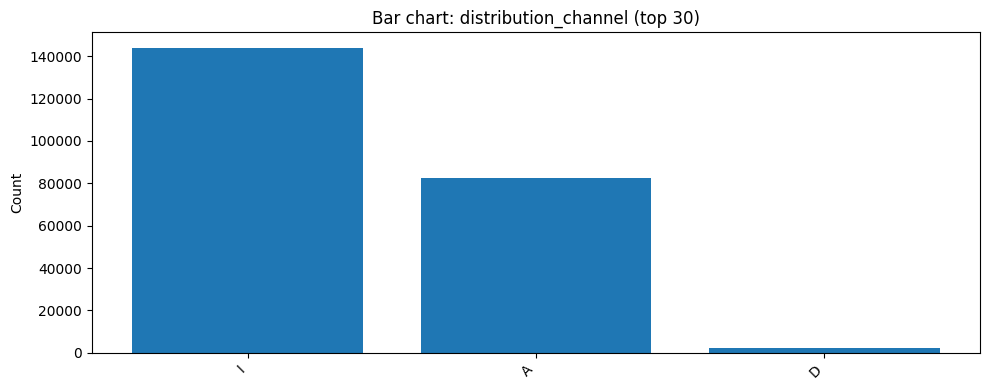

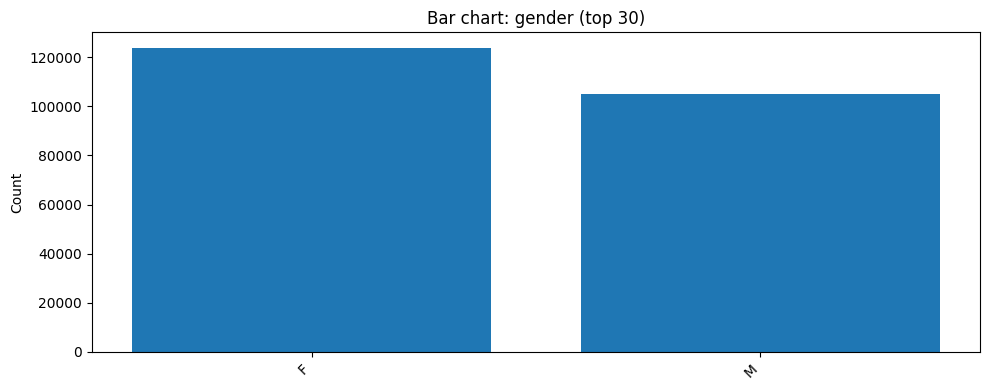

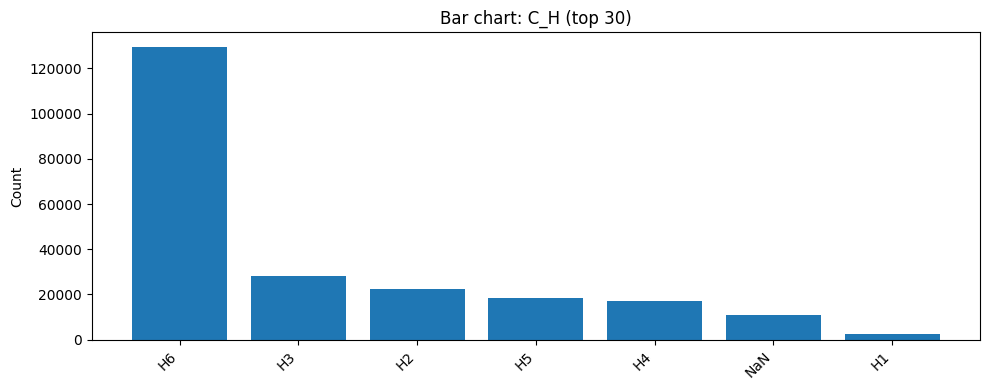

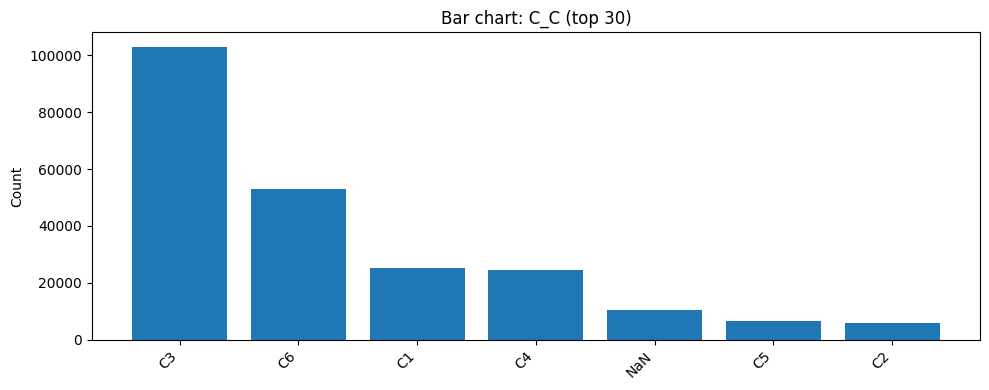


===== FIRST RESULTS (Linear Regression Baseline) =====
R2   : 0.4961
MAE  : 225.13
RMSE : 388.34


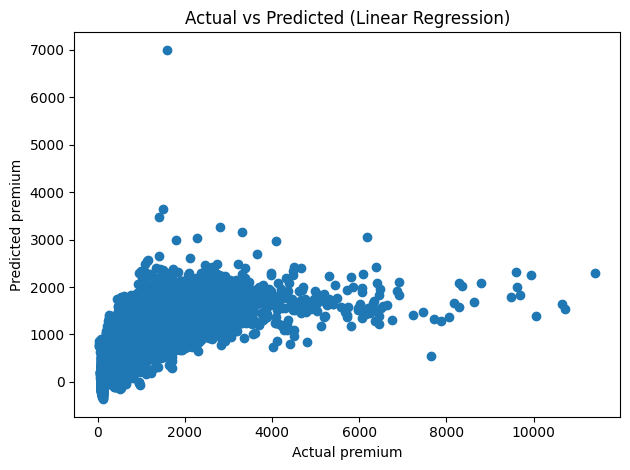

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

print("NOTEBOOK STARTED ✅")

# =========================
# 1) LOAD DATA
# =========================
BASE_DIR = Path().resolve()
CSV_PATH = BASE_DIR / "health_insurance_portfolio.csv"

if not CSV_PATH.exists():
    raise FileNotFoundError(
        f"Could not find {CSV_PATH.name} in: {BASE_DIR}\n"
        f"Files found: {[x.name for x in BASE_DIR.iterdir()]}"
    )

df = pd.read_csv(CSV_PATH)
print("Loaded:", CSV_PATH.name)
print("Shape:", df.shape)

print("\nMissing values (top 20):\n", df.isna().sum().sort_values(ascending=False).head(20))
print("\nColumns:\n", df.columns.tolist())

# =========================
# 2) TARGET
# =========================
TARGET_COL = None  # <-- set manually if you know it, e.g. "Annual_Premium"

target_candidates = [
    "premium", "annual_premium", "monthly_premium",
    "charges", "charge", "cost", "insurance_cost",
    "total_cost", "claim_amount", "claim", "amount", "price"
]

target = TARGET_COL if (TARGET_COL in df.columns) else None
if target is None:
    cols_lower = {c.lower(): c for c in df.columns}
    for cand in target_candidates:
        if cand in cols_lower:
            target = cols_lower[cand]
            break

if target is None:
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    keyword_hits = []
    for c in numeric_cols:
        cl = c.lower()
        if any(k in cl for k in ["prem", "charg", "cost", "claim", "amount", "price", "paid"]):
            keyword_hits.append(c)

    print("\n❌ Could not auto-detect target.")
    print("Suggested numeric target candidates:\n", keyword_hits[:50])
    raise ValueError("Set TARGET_COL to your premium/cost column name and rerun.")

print("\n✅ Target selected:", target)

# Drop rows where target is missing
df = df[df[target].notna()].copy()

# =========================
# 3) EDA: SPECIFIC PLOT FOR EACH COLUMN
# =========================

# Feature lists (excluding target)
all_num = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in all_num if c != target]
cat_cols = [c for c in df.columns if c not in all_num and c != target]

print("\nNumeric columns (excluding target):", len(num_cols))
print("Categorical columns (excluding target):", len(cat_cols))

def plot_numeric(col):
    x = df[col].dropna()
    if len(x) == 0:
        return

    # Histogram
    plt.figure()
    plt.hist(x, bins=30)
    plt.title(f"Histogram: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    # Boxplot
    plt.figure()
    plt.boxplot(x, vert=True)
    plt.title(f"Boxplot: {col}")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

def plot_categorical(col, top_n=30):
    s = df[col].astype("object").fillna("NaN")
    vc = s.value_counts().head(top_n)

    plt.figure(figsize=(10, 4))
    plt.bar(vc.index.astype(str), vc.values)
    plt.title(f"Bar chart: {col} (top {top_n})")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# Target plots
if pd.api.types.is_numeric_dtype(df[target]):
    plot_numeric(target)
else:
    plot_categorical(target)

# One plot set for each feature
for c in num_cols:
    plot_numeric(c)

for c in cat_cols:
    plot_categorical(c, top_n=30)

# =========================
# 4) MODEL (REGRESSION) WITH IMPUTATION
# =========================
X = df.drop(columns=[target])
y = df[target]

num_features = X.select_dtypes(include=[np.number]).columns.tolist()
cat_features = [c for c in X.columns if c not in num_features]

numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
])

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore")),
])

pre = ColumnTransformer([
    ("num", numeric_pipe, num_features),
    ("cat", categorical_pipe, cat_features),
])

model = Pipeline([
    ("pre", pre),
    ("reg", LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n===== FIRST RESULTS (Linear Regression Baseline) =====")
print(f"R2   : {r2:.4f}")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel(f"Actual {target}")
plt.ylabel(f"Predicted {target}")
plt.title("Actual vs Predicted (Linear Regression)")
plt.tight_layout()
plt.show()
